In [1]:
library(tidyverse)
library(cowplot)

# Custom package
library(rutils)

-- Attaching packages -------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ----------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 8
small_text_size <- 8
family <- "ArialMT"
dpi <- 320
ht <- 8.5
wd <- 6.25

In [4]:
hmplot_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/hmplots.RData")))

In [5]:
pcaplot_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/pcaplots.RData")))

In [6]:
umapplot_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/umapplots.RData")))

In [7]:
hmplot_figs
pcaplot_figs
umapplot_figs

[1] "gyn_hmplot" "pan_hmplot" "z_tileplot"

[1] "screeplot"           "small_multplot"      "pc1_pc2_scatterplot"
[4] "pc2_pc3_scatterplot"

[1] "pan_umapplot" "gyn_umapplot"

In [8]:
set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

hide_legend <- function(plt) {
    plt + theme(legend.position="none")
}

hide_axis_title <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.title.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.title.y = element_blank())
    }
    plt
}

rename_axis_title <- function(plt, axis = "x", n_title = "") {
    if (axis == "x") {
        plt <- plt + labs(x = n_title)
    }
    else if (axis == "y") {
        plt <- plt + labs(y = n_title)
    }
    plt
}

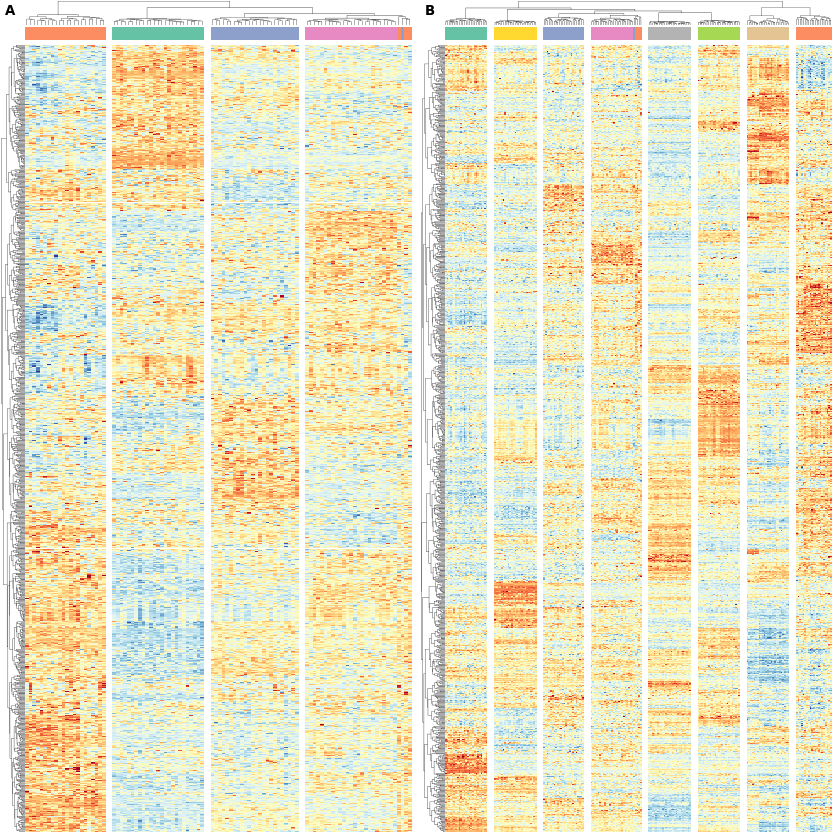

In [9]:
hmplot_list <- c(
    mget("gyn_hmplot"),
    mget("pan_hmplot")
) %>%
    purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0)) })

hm_grid <- plot_grid(
    plotlist = hmplot_list,
    ncol = 2,
    labels = c("A", "B"),
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold",
    align = "vh"
)
hm_grid

In [10]:
pcaplot_list <- c(
    mget("screeplot") %>%
        purrr::map(function(p) { rename_axis_title(p, "y", "% var.") }) %>%
        purrr::map(function(p) { set_margins(p, c(0.5, 0, 0, 0.25)) }),
    mget("pc1_pc2_scatterplot") %>%
        purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0.25)) }),
    mget("small_multplot") %>%
        purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0.5)) })
) 

# sm_grid <- plot_grid(
#     plotlist = pcaplot_list[3],
#     ncol = 1,
#     labels = c("C"),
#     label_fontfamily = family,
#     label_size = label_text_size,
#     label_fontface = "bold"
# )
# sm_grid

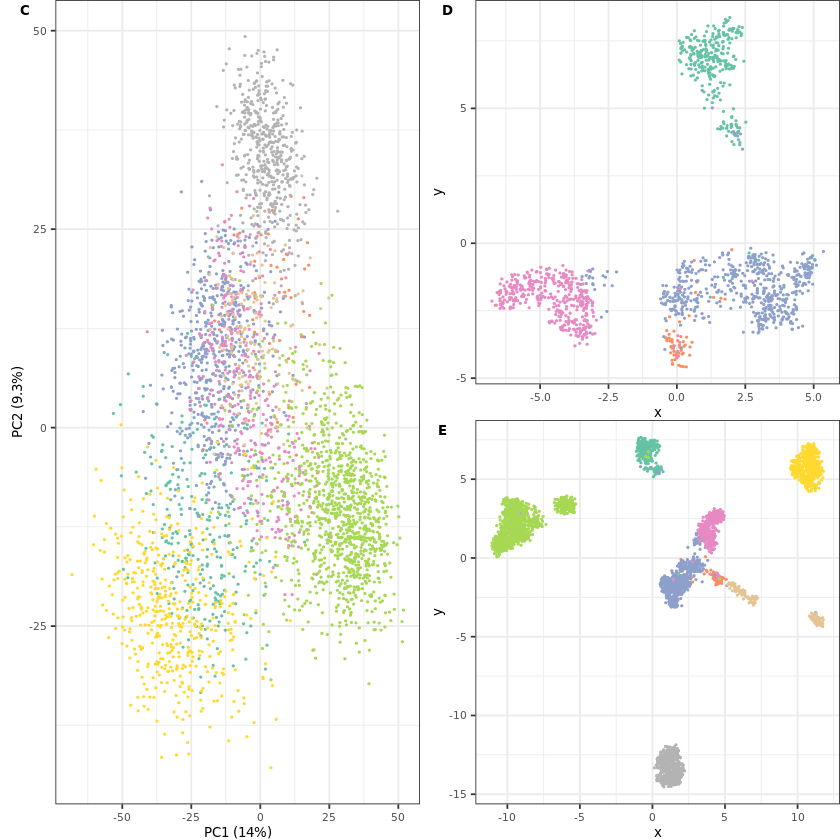

In [11]:
umapplot_list <- c(
    mget("gyn_umapplot"),
    mget("pan_umapplot")
) %>%
    purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0.25)) }) %>%
    purrr::map(function(p) { hide_legend(p) })

# scatter_grid <- plot_grid(
#     plotlist = c(pcaplot_list[2], umapplot_list),
#     ncol = 1,
#     labels = c("D", "E", "F"),
#     label_fontfamily = family,
#     label_size = label_text_size,
#     label_fontface = "bold",
#     label_x = 0.03,
#     align = "vh",
#     rel_heights = c(1, 1, 1)
# )
# scatter_grid

pca_grid <- plot_grid(
    pcaplot_list[[2]],
    labels = c("C"),
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold",
    hjust = -2
)
# pca_grid

umap_grid <- plot_grid(
    umapplot_list[[1]],
    umapplot_list[[2]],
    nrow = 2,
    align = "vh",
    labels = c("D", "E"),
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold",
    hjust = -2
)
# umap_grid

scatter_grid <- plot_grid(pca_grid, umap_grid, ncol = 2, align = "vh")
scatter_grid

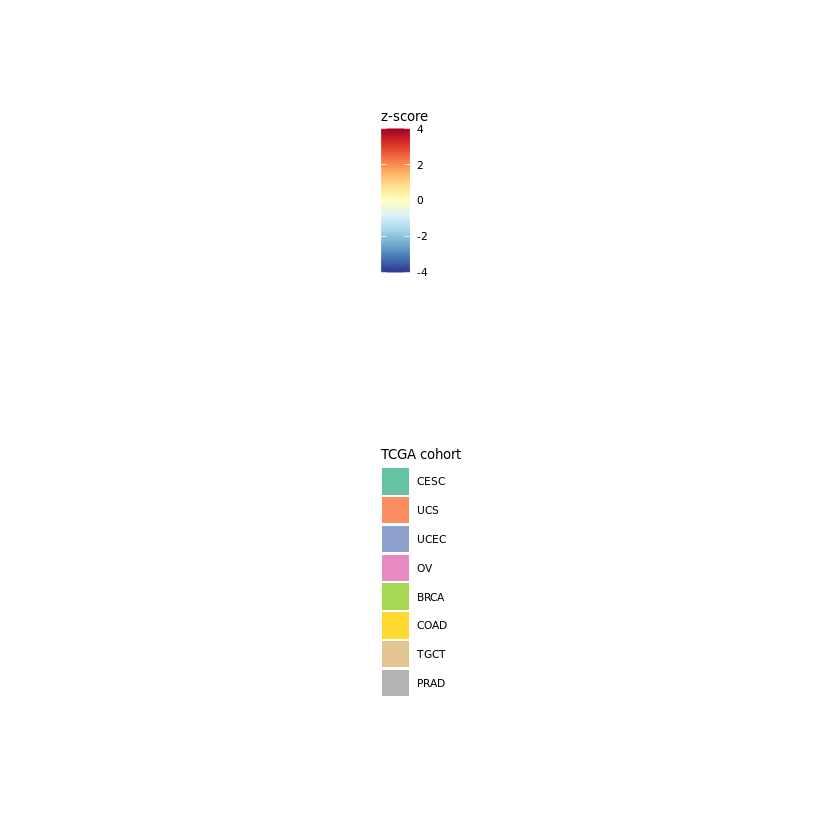

In [12]:
z_legend <- get_legend(z_tileplot + theme(legend.position = "right", plot.margin = unit(c(0, 0, 0, 0), "cm")))
ctype_legend <- get_legend(small_multplot + theme(legend.position = "right", plot.margin = unit(c(0, 0, 0, 0), "cm")))
legend_grid <- plot_grid(
    z_legend,
    ctype_legend,
    NULL,
    nrow = 3,
    align = "vh",
    rel_heights = c(1, 1, 0.2)
)
legend_grid

In [ ]:
z_legend %>% ggsave(filename = paste0("/mnt/d", "/z_legend.png"), dpi = dpi, height = 2, width = 2)
ctype_legend %>% ggsave(filename = paste0("/mnt/d", "/z_legend.png"), dpi = dpi, height = 2, width = 2)

In [ ]:
fig2 <- plot_grid(
    plot_grid(hm_grid, legend_grid, ncol = 2, rel_widths = c(1, 0.15)),
#     plot_grid(sm_grid, scatter_grid, ncol = 2, rel_widths = c(1.2, 1)),
    plot_grid(scatter_grid, ncol = 2, rel_widths = c(1, 0.165)),
    ncol = 1,
    rel_heights = c(1, 0.8),
    align = "vh"
)
fig2

# fig2 <- plot_grid(
#     plt_grid,
#     legend_grid,
#     ncol = 2,
#     rel_widths = c(1, 0.15)
# )
# fig2

In [ ]:
ggsave(fig2, filename = paste0(dirs$figures_dir, "/paneled/figure2.png"), dpi = dpi, height = ht, width = wd)